In [1]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from mpl_toolkits.axes_grid.axislines import SubplotZero

## Phase Portrait of Van der pols Equation

In [36]:
# https://commons.wikimedia.org/wiki/File:Van_der_pols_equation_phase_portrait.svg

[None, None, None, None, None, None]

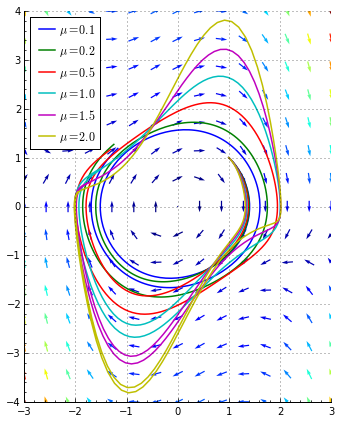

In [37]:
def myFun(u,t=0.,mu=.5):
    x = u[0]
    v = u[1]
    dx = v
    dv = mu*(1.-x**2)*v-x
    return (dx,dv)

t = np.linspace(-5.5,5.5,300)
u0 = np.array([1.,1.])
mu = [.1, .2, .5, 1., 1.5, 2.0]
fig = plt.figure(figsize=(5.5,7))
ax = SubplotZero(fig,111)
fig.add_subplot(ax)
ax.grid(True)
for direction in ["right","top"]:
        ax.axis[direction].set_visible(False)
for m in mu:
    u = odeint(myFun,u0,t,args=(m,))
    ax.plot(u[:,0],u[:,1],lw=1.5,label=r'$\mu=%.1f$'%m)
x = np.linspace(-3,3,15)
y = np.linspace(-4,4,15)
x,y = np.meshgrid(x,y)
X,Y = myFun([x,y])
M = (sp.hypot(X,Y))
M[M==0]=1.
X,Y = X/M, Y/M
ax.quiver(x,y,X,Y,M,pivot='mid',cmap=plt.cm.jet)
ax.minorticks_on()
ax.legend(handletextpad=0,loc='upper left')
plt.setp(ax.get_legend().get_texts(),fontsize=12)

## How to Plot Phase Portrait Using matplotlib.quiver

In [43]:
def fitzhugh(u, w):
    b0 = 1
    b1 = 1
    cur = 0
    
    du = u - u**3/2 - w
    dw = b0 + b1*u - w
    return (du, dw)

In [46]:

u = np.linspace(-0.4, 1.6, 20)
w = np.linspace(-0.4, 1.6, 20)
# Create a grid for evaluation of the vector field
u, w = np.meshgrid(u, w)
# Evaluate the slopes
U, W = fitzhugh(u, w)
# Compute the magnitude vector
M = np.hypot(U, W)
# Normalize the slopes vectors so their magnitudes are 1
U, W = U/M, W/M


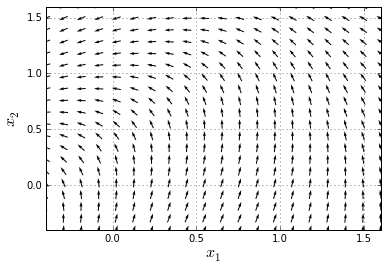

In [47]:
plt.quiver(u, w, U, W, pivot='mid')
plt.xlim([-0.4, 1.6])
plt.ylim([-0.4, 1.6])
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.grid()
plt.show()